In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import joblib
from joblib import load
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Load dataset for training and test
def processing(address):
    img = cv2.imread(address)
    img = cv2.resize(img, (32,32))
    img = img/255
    img = img.flatten()
    return img

# Training
features_training = []
labels_training =[]
for i, address in enumerate(glob.glob('Q2/train//*//*')):
    img = processing(address)
    features_training.append(img)
    labels_training.append(address.split('/')[-1].split('.')[0])

features_training = np.array(features_training)

# Test
features_test = []
labels_test = []
for i, address in enumerate(glob.glob('Q2/test//*//*')):
    img = processing(address)
    features_test.append(img)
    labels_test.append(address.split('/')[-1].split('.')[0].split(' ')[0].lower())

features_test = np.array(features_test)

In [111]:
# Our data is already split into training and testing, also it's already normalized

# Model using KNN 
model = KNeighborsClassifier(n_neighbors=20) # Using 20 neighbors bring better accuracy 
model.fit(features_training, labels_training)


# Evaluate using KNN
preds = model.predict(features_test)
print(f'accuracy = {accuracy_score(labels_test, preds)}')

# Model using LogisticRegression
model_2 = LogisticRegression(max_iter=9)
model_2.fit(features_training, labels_training)

# Evaluate using LogisticRegression
preds = model_2.predict(features_test)
print(f'accuracy = {accuracy_score(labels_test, preds)}')

# Save model
joblib.dump(model, "cat_vs_dog.z")
joblib.dump(model_2, "cat_vs_dog_2.z")

accuracy = 0.7
accuracy = 0.8


['cat_vs_dog_2.z']

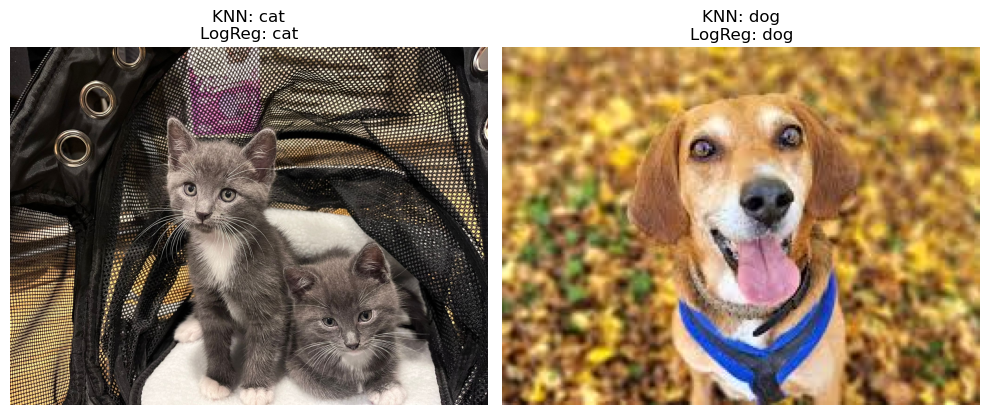

In [120]:
# Import the model from my directory
loaded_model = load('cat_vs_dog.z')
loaded_model_2 = load('cat_vs_dog_2.z')

def testing(address):
    img = cv2.imread(address)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = img.flatten()
    return img, cv2.cvtColor(cv2.imread(address), cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib


cat_flattened, cat_rgb = testing('./cats.jpeg')
dog_flattened, dog_rgb = testing('./dog.jpeg')

# test the model using an image using KNN
preds_knn = loaded_model.predict([cat_flattened, dog_flattened])

# test the model using an image using LogisticRegression
preds_log = loaded_model_2.predict([cat_flattened,dog_flattened])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

images = [cat_rgb, dog_rgb]
titles = [
    f"KNN: {preds_knn[0]}\nLogReg: {preds_log[0]}",
    f"KNN: {preds_knn[1]}\nLogReg: {preds_log[1]}"
]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()
